# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get today's date for the graphing
today = date.today()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100) #1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

77

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#construct URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="  #&units={units}
#print(query_url) #sanity check

#declare variables for holdin' and incrementing
recIncrem = 1
setIncrem = 1

lat = []
lon = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []
cityList = []

#start of output and data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

#loop through to get weather data for each city
for city in cities:    
    try:
        response = requests.get(query_url+city).json()
        
        #getting values!
        cityList.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['visibility'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #print(response["name"]) #sanity check
        print(f"Processing Record {recIncrem} of Set {setIncrem} | {response['name']} - {response['id']}")
        
        #setting up the output record number and sets
        recIncrem += 1
        
        if recIncrem > 50:
            setIncrem += 1
            recIncrem = 1
            
    except KeyError:
        print(f"City not Found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
City not Found. Skipping...
Processing Record 1 of Set 1 | Port Alfred - 964432
Processing Record 2 of Set 1 | Ushuaia - 3833367
Processing Record 3 of Set 1 | Punta Arenas - 3874787
Processing Record 4 of Set 1 | Atuona - 4020109
Processing Record 5 of Set 1 | Katsuura - 2112309
Processing Record 6 of Set 1 | Asău - 686090
Processing Record 7 of Set 1 | Tucumcari - 5495360
Processing Record 8 of Set 1 | Namwala - 901766
Processing Record 9 of Set 1 | Bluff - 2206939
Processing Record 10 of Set 1 | Cape Town - 3369157
Processing Record 11 of Set 1 | Port Elizabeth - 964420
Processing Record 12 of Set 1 | Coxim - 3465228
Processing Record 13 of Set 1 | Mataura - 6201424
Processing Record 14 of Set 1 | Cascais - 2269594
Processing Record 15 of Set 1 | Cherskiy - 2126199
Processing Record 16 of Set 1 | Kerchevskiy - 551047
Processing Record 17 of Set 1 | Mar del Plata - 3430863
Processing Record 18 of Set 1 | San Joaquin - 5392126
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dict to dataframe of cities and weather information
weatherDict = {
    "City" : cityList,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : maxTemp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : windSpeed,
    "Country" : country,
    "Date" : date
}

#convert dictionary to df
weatherDF = pd.DataFrame(weatherDict)

#declare csv output path
outputPath="Output/"
outputCsv= outputPath+"weather.csv"

# Export file as a CSV, without the Pandas index, but with the header
weatherDF.to_csv(outputCsv, index=False, header=True)

#display
weatherDF.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,295.43,69,10000,11.82,ZA,1619184827
1,Ushuaia,-54.8000,-68.3000,278.15,93,10000,1.54,AR,1619184693
2,Punta Arenas,-53.1500,-70.9167,281.15,93,300,1.54,CL,1619184669


In [5]:
#display statistics
weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01
mean,7.332163,10.661175,288.383088,70.367647,9343.573529,3.714853,1.619185e+09
std,38.353841,101.316151,12.220155,22.295106,1939.344029,2.762198,4.683557e+01
min,-54.800000,-175.200000,248.780000,10.000000,300.000000,0.450000,1.619185e+09
25%,-27.309750,-72.725025,282.592500,58.000000,10000.000000,1.485000,1.619185e+09
50%,-2.031850,25.985050,290.760000,73.000000,10000.000000,3.090000,1.619185e+09
75%,41.274400,109.914825,297.200000,88.000000,10000.000000,5.142500,1.619185e+09
max,78.218600,168.864300,307.490000,100.000000,10000.000000,11.820000,1.619185e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check for humidity >100% if none exists reuse dataframe
miserableDF = weatherDF.loc[(weatherDF["Humidity"] > 100.00)]
miserableDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
indexList = miserableDF.index.tolist()
indexList

[]

# * BELOW NEEDS ATTENTION

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityData = weatherDF.loc[(weatherDF["Humidity"] <= 100.00)]
cleanCityData["Date"] = pd.to_datetime(weatherDF["Date"], unit ='s')
cleanCityData.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,295.43,69,10000,11.82,ZA,2021-04-23 13:33:47
1,Ushuaia,-54.8000,-68.3000,278.15,93,10000,1.54,AR,2021-04-23 13:31:33
2,Punta Arenas,-53.1500,-70.9167,281.15,93,300,1.54,CL,2021-04-23 13:31:09
3,Atuona,-9.8000,-139.0333,299.97,78,10000,10.06,PF,2021-04-23 13:33:47
4,Katsuura,35.1333,140.3000,286.15,71,10000,5.14,JP,2021-04-23 13:33:47


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

# ABOVE NEEDS ATTENTION
- fix title with date
- do analysis

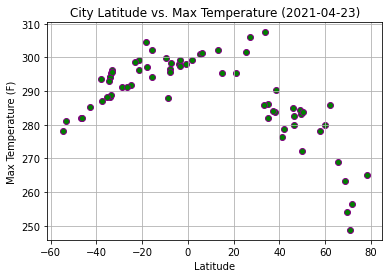

In [25]:
#plotting.... for evil... bwahahahahahahahahahaha
outputLatTemp = outputPath + "figureLatTemp.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Max Temp"]

plt.scatter(xAxis, yAxis, marker = 'o', c='green', edgecolors="purple")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig(outputLatTemp)
plt.show()


## Latitude vs. Humidity Plot

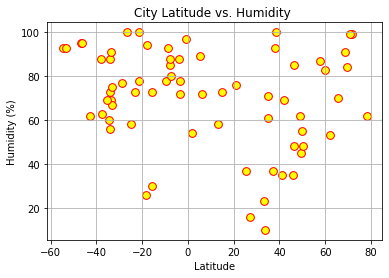

In [21]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatHum = outputPath + "figureLatHum.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Humidity"]

plt.scatter(xAxis, yAxis, marker = 'o', c='yellow', edgecolors="red", s=60)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig(outputLatHum)
plt.show()

## Latitude vs. Cloudiness Plot

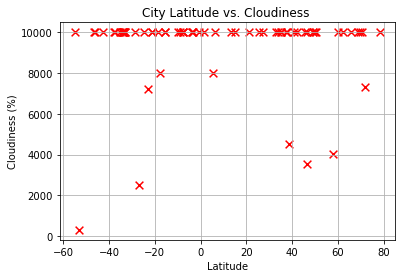

In [20]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatCloud = outputPath + "figureLatCloud.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Cloudiness"]

plt.scatter(xAxis, yAxis, marker = 'x', c='red', edgecolors="black", s=60)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig(outputLatCloud)
plt.show()

## Latitude vs. Wind Speed Plot

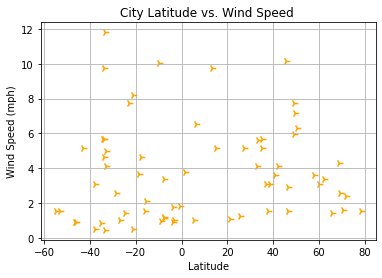

In [19]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatWind = outputPath + "figureLatWind.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Wind Speed"]

plt.scatter(xAxis, yAxis, marker = '4', c='orange', edgecolors="blue", s=60)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig(outputLatWind)
plt.show()

## Linear Regression

#### Methods for efficiency

In [173]:
def linearStatement (someNum):
    numCheck = abs(someNum[0])
    outputStr = f"The r-value is: {round(someNum[0],3)}. This designates "
    if numCheck >= .7: # i believe this was in the class slides for day 3.
        outputStr += "a strong relationship."
    elif numCheck >= .5:
        outputStr += "a moderate relationship."
    elif numCheck >= .3:
        outputStr += "a weak relationship."
    else:
        outputStr += "either no or very weak relationship."
    
    return outputStr
    
#print(linearStatement([.73])) #sanity check

In [163]:
#method to create the different plots
def createPlot (xCol, yCol, xLab, yLab, title):
    #get plot (dot) data
    dotX = xCol
    dotY = yCol

    #get line for linearness
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dotX, dotY)
    regressVals = dotX * slope + intercept
    lineEQ =  "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

    #create annotation coordinates
    xStart = int(dotX.min())
    yStart = int(dotY.min()) + 3
    if xStart < 0:
        xStart = -30
        
    #calculate correlation coeff
    corCoef = st.pearsonr(dotX, dotY)

    #print the r value
    print(linearStatement(corCoef)+"\n")

    #plot
    plt.scatter(dotX, dotY, marker= 'o', c="purple", s=60, edgecolors="purple")
    plt.plot(dotX,regressVals,"r-")
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.title(title)
    #annotating because we learned this in class :)
    plt.annotate(lineEQ,(xStart,yStart),fontsize=13,color="red")

    plt.show()
    
#createPlot(nHemiDF["Lat"],nHemiDF["Max Temp"],"Latitude","Max Temp") #sanity check

In [164]:
#create dataframes for the different hemispheres
nHemiDF = cleanCityData.loc[(weatherDF["Lat"] > 0)]
sHemiDF = cleanCityData.loc[(weatherDF["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.855. This designates a strong relationship.



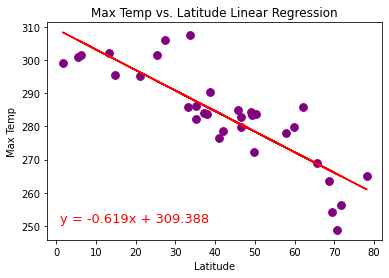

In [174]:
createPlot(nHemiDF["Lat"],nHemiDF["Max Temp"],"Latitude","Max Temp","Max Temp vs. Latitude Linear Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.76. This designates a strong relationship.



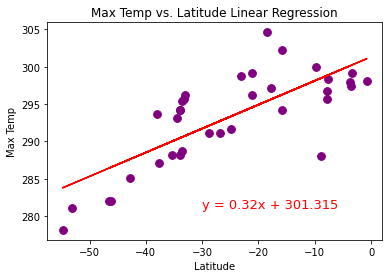

In [166]:
createPlot(sHemiDF["Lat"],sHemiDF["Max Temp"],"Latitude","Max Temp","Max Temp vs. Latitude Linear Regression")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26. This designates either no or very weak relationship.



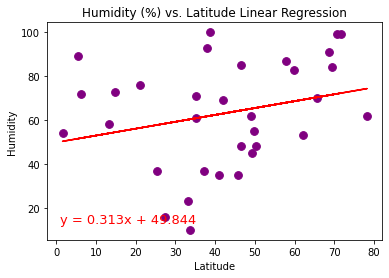

In [167]:
createPlot(nHemiDF["Lat"],nHemiDF["Humidity"],"Latitude","Humidity","Humidity (%) vs. Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.037. This designates either no or very weak relationship.



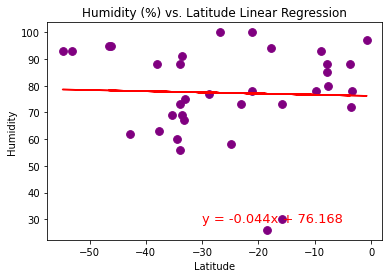

In [168]:
createPlot(sHemiDF["Lat"],sHemiDF["Humidity"],"Latitude","Humidity","Humidity (%) vs. Latitude Linear Regression")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.092. This designates either no or very weak relationship.



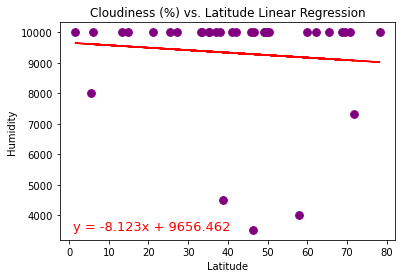

In [169]:
createPlot(nHemiDF["Lat"],nHemiDF["Cloudiness"],"Latitude","Humidity","Cloudiness (%) vs. Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.242. This designates either no or very weak relationship.



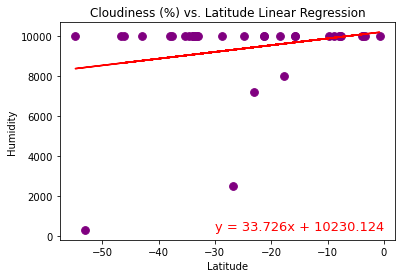

In [170]:
createPlot(sHemiDF["Lat"],sHemiDF["Cloudiness"],"Latitude","Humidity","Cloudiness (%) vs. Latitude Linear Regression")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.216. This designates either no or very weak relationship.



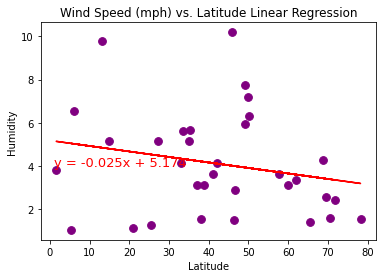

In [171]:
createPlot(nHemiDF["Lat"],nHemiDF["Wind Speed"],"Latitude","Humidity","Wind Speed (mph) vs. Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.073. This designates either no or very weak relationship.



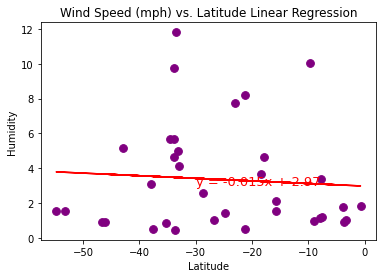

In [172]:
createPlot(sHemiDF["Lat"],sHemiDF["Wind Speed"],"Latitude","Humidity","Wind Speed (mph) vs. Latitude Linear Regression")